# Problem Statement:
Need to use the Data Science and Machine Learning technique to automate the Loan Approval Process System.This would reduce the burden of bank Manager and help him/her to take the better decision.

In [1]:
#Check the Current Working Directory:
import os
os.getcwd()

'F:\\2020\\Hackathon\\Code\\1. Loan-Predictionav'

In [2]:
#Import the Libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#Load the Data:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

We would do the Exploratory Data Analysis(EDA) to understand the Data.

In [4]:
#Header and footer would assure that data is loaded properly in the envirionment.
#It would also give a broef idea about the data
#Show the header(first 5 rows for the train_data)
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
#Footer for train_data:
train_data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


We are satisfied that train_data is Loaded properly.

In [6]:
#Header for the test_data:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [7]:
#Footer for the test_data:
test_data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural
366,LP002989,Male,No,0,Graduate,Yes,9200,0,98.0,180.0,1.0,Rural


In [8]:
#Check the Dimension:
print("The dimension(rows,column) for train_data is:",train_data.shape)
print("The dimensions(rows,column) for test_data is:",test_data.shape)

The dimension(rows,column) for train_data is: (614, 13)
The dimensions(rows,column) for test_data is: (367, 12)


# Types of the Attribute
#Train_data and Test_data

In [9]:
#Check the types of attributes:
print("Attributes Information for train_data is:",train_data.info())
print("------------------------------------------------------------")
print("Attributes Information for test_data is:",test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
Attributes Information for train_data is: None
------------------------------------------------------------
<cla

In [10]:
#We observe that "CoapplicantIncome" column in train_data is "float" while it is "int64" in test_data 
#Convert "CoapplicantIncome" column for test_data into float
test_data[["CoapplicantIncome"]] = test_data[["CoapplicantIncome"]].astype(float)

In [11]:
#Check the types of attributes:
print("Attributes Information for train_data is:",train_data.info())
print("------------------------------------------------------------")
print("Attributes Information for test_data is:",test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
Attributes Information for train_data is: None
------------------------------------------------------------
<cla

# Summary for train_data and test_data

In [12]:
#Check the Summary for Numerical data of train_data:
print("The summary for the Numerical data in train-data:")
train_data.describe()

The summary for the Numerical data in train-data:


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [13]:
#Check the Attributes

In [14]:
#Summary for the categorica dats in train_data:
print("It shows the summary for the categorical data of train_data:")
train_data.describe(include = "object")

It shows the summary for the categorical data of train_data:


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001964,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [15]:
#Column Names for train_data:
train_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [16]:
#Column names for test_data:
test_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

# Missing Values Treatment

In [17]:
#Check the Missing Values in train_data:
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [18]:
#Check the missing values Percentage-wise in train data:
print("Missing Values in train data:")
((train_data.isnull().sum())/train_data.shape[0])*100

Missing Values in train data:


Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [19]:
#Check the missing values Percentage-wise in test data:
print("Missing Values in test data:")
((test_data.isnull().sum())/test_data.shape[0])*100

Missing Values in test data:


Loan_ID              0.000000
Gender               2.997275
Married              0.000000
Dependents           2.724796
Education            0.000000
Self_Employed        6.267030
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           1.362398
Loan_Amount_Term     1.634877
Credit_History       7.901907
Property_Area        0.000000
dtype: float64

In [20]:
#Check the data types for train and test attributes:
print(train_data.dtypes)
print("--------------------------")
print(test_data.dtypes)

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object
--------------------------
Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object


In [21]:
#Analyze and find the Numerical and Categorical data in train and test data

In [22]:
#Find the Numerical and Categorical Attributes:
num_attr = ["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","Credit_History"]
cat_attr = ['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','Property_Area',]
target =   ['Loan_Status']

In [23]:
#Fill the Missing values in train_data:
train_num_attr = train_data[num_attr]
train_cat_attr = train_data[cat_attr]

In [24]:
import statistics

In [25]:
#To Create the mode for categorical data and median for numerical data for filling in train_data:
mode1 = statistics.mode(train_cat_attr['Gender'])
mode2 = train_cat_attr["Married"].mode().values[0]
mode3 = train_cat_attr["Dependents"].mode().values[0]
mode4 = train_cat_attr["Self_Employed"].mode().values[0]
median5 = train_num_attr["LoanAmount"].median()
median6 = train_num_attr["Loan_Amount_Term"].median()
median7 = train_num_attr["Credit_History"].median()

In [26]:
print(mode1,mode2,mode3,mode4,median5,median6,median7)
print(mode2)

Male Yes 0 No 128.0 360.0 1.0
Yes


In [27]:
#Fill the missing values in train_cat_attr,train_num_attr data:
train_cat_attr["Gender"].replace(np.nan,mode1,inplace=True)
train_cat_attr["Married"].replace(np.nan,mode2,inplace=True)
train_cat_attr["Dependents"].replace(np.nan,mode3,inplace=True)
train_cat_attr["Self_Employed"].replace(np.nan,mode4,inplace=True)
train_num_attr["LoanAmount"].replace(np.nan,median5,inplace=True)
train_num_attr["Loan_Amount_Term"].replace(np.nan,median6,inplace=True)
train_num_attr["Credit_History"].replace(np.nan,median7,inplace=True)

C:\Users\HARIOHM\anaconda3\lib\site-packages\pandas\core\series.py:4569: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [28]:
#Check the Missing Values in train_cat_attr and train_num_attr
print("Total Missing Values in train_cat_attr:",train_cat_attr.isna().sum())
print("Total Missing values in train_num_attr:",train_num_attr.isna().sum())

Total Missing Values in train_cat_attr: Loan_ID          0
Gender           0
Married          0
Dependents       0
Education        0
Self_Employed    0
Property_Area    0
dtype: int64
Total Missing values in train_num_attr: ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64


In [29]:
#Check the dimesnions of numerical and categorical col for train data:
print(train_cat_attr.shape)
print(train_num_attr.shape)

(614, 7)
(614, 5)


# The Target Column is "Loan_Status"

In [30]:
train_data[["Loan_Status"]].shape

(614, 1)

In [31]:
#Missing Values is treated in train_data and combined into one dataframe:
train_num_cat = pd.concat([train_num_attr,train_cat_attr,train_data[["Loan_Status"]]],axis=1)

In [32]:
#Check the dimension:
train_num_cat.shape

(614, 13)

In [33]:
train_num_cat.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,5849,0.0,128.0,360.0,1.0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,4583,1508.0,128.0,360.0,1.0,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,3000,0.0,66.0,360.0,1.0,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,2583,2358.0,120.0,360.0,1.0,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,6000,0.0,141.0,360.0,1.0,LP001008,Male,No,0,Graduate,No,Urban,Y


# Missing Value Treatment for the test data:

In [34]:
#To Create the mode for categorical data and median for numerical data for filling in train_data:
mode1t = statistics.mode(train_cat_attr['Gender'])
mode2t = train_cat_attr["Dependents"].mode().values[0]
mode3t = train_cat_attr["Self_Employed"].mode().values[0]
median4t = train_num_attr["LoanAmount"].median()
median5t = train_num_attr["Loan_Amount_Term"].median()
median6t = train_num_attr["Credit_History"].median()

In [35]:
#Replace the Missing Values in test data:
test_data["Gender"].replace(np.nan,mode1t,inplace=True)
test_data["Dependents"].replace(np.nan,mode2t,inplace=True)
test_data["Self_Employed"].replace(np.nan,mode3t,inplace=True)
test_data["LoanAmount"].replace(np.nan,median4t,inplace=True)
test_data["Loan_Amount_Term"].replace(np.nan,median5t,inplace=True)
test_data["Credit_History"].replace(np.nan,median6t,inplace=True)

In [36]:
#After Missing Value Treatment check the missing Values:
test_data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [37]:
#Check the duplicates values in train_num_cat:
train_duplicate = train_num_cat.duplicated()
train_duplicate.sum()


0

In [38]:
#It has 0 duplicate values bUt if we have duplicate values then we can also check:
#train_num_cat[train_duplicate]

#If want to drop the duplicates then:
#train_num_cat.drop_duplicates(inplace=True)

In [39]:
#Check the duplicates in test_data:
dpl_test = test_data.duplicated()
dpl_test.sum()

0

In [40]:
#Test data has also no duplicate observations.

# Check the Outlier Treatment:

<AxesSubplot:>

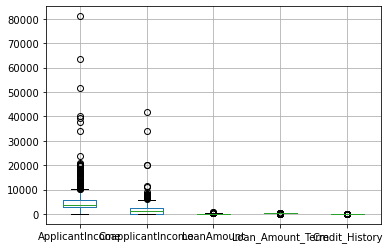

In [41]:
#Use the Box and Whisker Plot to find the Outlier into train_num_cat dataframe using the numerical data:
train_num_cat.boxplot(column = ["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","Credit_History"])

In [42]:
#It is observed that outlier is present. 
#as per the domain understanding it migh not 
#But statistically it has outlier present.
#We can treat the Outlier by:
#1. Drop the Outlier
#2. Replace the outlier Values using IQR

In [43]:
#Create a user defined function called remove_outlier for getting the threshold value from IQR.
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range = Q1-(1.5*IQR)
    upper_range = Q3+(1.5*IQR)
    return lower_range,upper_range

In [44]:
#Remove the Outlier from Applicant Column:
lowincome,uppincome=remove_outlier(train_num_cat["ApplicantIncome"])
train_num_cat[["ApplicantIncome"]] = np.where(train_num_cat[["ApplicantIncome"]]>uppincome,uppincome,train_num_cat[["ApplicantIncome"]])
train_num_cat[["ApplicantIncome"]] = np.where(train_num_cat[["ApplicantIncome"]]<lowincome,lowincome,train_num_cat[["ApplicantIncome"]])

In [45]:
#Remove the Outlier from CopplicantIncome Column:
lowincome,uppincome=remove_outlier(train_num_cat["CoapplicantIncome"])
train_num_cat[["CoapplicantIncome"]] = np.where(train_num_cat[["CoapplicantIncome"]]>uppincome,uppincome,train_num_cat[["CoapplicantIncome"]])
train_num_cat[["CoapplicantIncome"]] = np.where(train_num_cat[["CoapplicantIncome"]]<lowincome,lowincome,train_num_cat[["CoapplicantIncome"]])

<AxesSubplot:>

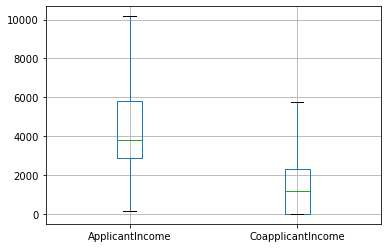

In [46]:
train_num_cat.boxplot(column = ["ApplicantIncome","CoapplicantIncome"])

<AxesSubplot:>

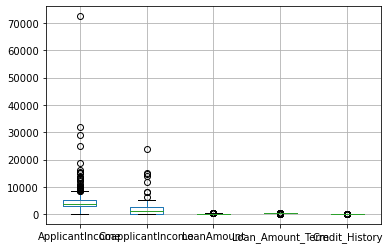

In [47]:
#If test_data is told for the outlier treatment then we can go for the treatment.
test_data.boxplot()
#Here we won't do that because of Business requirement. We need to go for the prediction for test_data

In [48]:
#Find the Correlations in train_num_data:
train_num_cat.corr()
#Observation not much correlated.

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.228956,0.559780,-0.023926,0.035345
CoapplicantIncome,-0.228956,1.000000,0.203743,-0.029295,-0.001710
LoanAmount,0.559780,0.203743,1.000000,0.036960,-0.000607
Loan_Amount_Term,-0.023926,-0.029295,0.036960,1.000000,-0.004705
Credit_History,0.035345,-0.001710,-0.000607,-0.004705,1.000000


# Scaling through Standardizations:

In [49]:
#Scaling the numerical column in train_num_cat data:
from sklearn.preprocessing import StandardScaler
StdScale = StandardScaler()


In [50]:
#Scale the train_num_cat data(Only Numerical data):

train_num_cat[["ApplicantIncome"]] = StdScale.fit_transform(train_num_cat[["ApplicantIncome"]])
train_num_cat[["CoapplicantIncome"]] = StdScale.fit_transform(train_num_cat[["CoapplicantIncome"]])
train_num_cat[["LoanAmount"]] = StdScale.fit_transform(train_num_cat[["LoanAmount"]])
train_num_cat[["Loan_Amount_Term"]] = StdScale.fit_transform(train_num_cat[["Loan_Amount_Term"]])
train_num_cat[["Credit_History"]] = StdScale.fit_transform(train_num_cat[["Credit_History"]])

In [51]:
train_num_cat.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,0.497164,-0.874587,-0.211241,0.273231,0.411733,LP001002,Male,No,0,Graduate,No,Urban,Y
1,-0.013767,0.054395,-0.211241,0.273231,0.411733,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,-0.652632,-0.874587,-0.948996,0.273231,0.411733,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,-0.820924,0.578025,-0.306435,0.273231,0.411733,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,0.558104,-0.874587,-0.056551,0.273231,0.411733,LP001008,Male,No,0,Graduate,No,Urban,Y


In [52]:
#Scale the test_data(Numerical data):
test_data[["ApplicantIncome"]] = StdScale.fit_transform(test_data[["ApplicantIncome"]])
test_data[["CoapplicantIncome"]] = StdScale.fit_transform(test_data[["CoapplicantIncome"]])
test_data[["LoanAmount"]] = StdScale.fit_transform(test_data[["LoanAmount"]])
test_data[["Loan_Amount_Term"]] = StdScale.fit_transform(test_data[["Loan_Amount_Term"]])
test_data[["Credit_History"]] = StdScale.fit_transform(test_data[["Credit_History"]])

In [53]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,0.186461,-0.673335,-0.427496,0.266022,0.437674,Urban
1,LP001022,Male,Yes,1,Graduate,No,-0.352692,-0.029848,-0.164642,0.266022,0.437674,Urban
2,LP001031,Male,Yes,2,Graduate,No,0.039641,0.098849,1.182486,0.266022,0.437674,Urban
3,LP001035,Male,Yes,2,Graduate,No,-0.502774,0.418877,-0.591780,0.266022,0.437674,Urban
4,LP001051,Male,No,0,Not Graduate,No,-0.311909,-0.673335,-0.953205,0.266022,0.437674,Urban


In [54]:
#Column Names for train_num_cat and test_data:
print(train_num_cat.columns)
print("--------------------------------")
print(test_data.columns)

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_ID', 'Gender', 'Married',
       'Dependents', 'Education', 'Self_Employed', 'Property_Area',
       'Loan_Status'],
      dtype='object')
--------------------------------
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')


In [55]:
#Attribute analysis:
#Loan_ID is just a name so no need to go for the Model Building but store into system:
train_LoanID = train_num_cat[["Loan_ID"]]    
test_LoanID = test_data[["Loan_ID"]]
#Drop Loan_ID from the train and test data:
train_num_cat.drop(columns = ["Loan_ID"],inplace=True)
test_data.drop(columns = ["Loan_ID"],inplace=True)


In [56]:
test_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,0.186461,-0.673335,-0.427496,0.266022,0.437674,Urban
1,Male,Yes,1,Graduate,No,-0.352692,-0.029848,-0.164642,0.266022,0.437674,Urban
2,Male,Yes,2,Graduate,No,0.039641,0.098849,1.182486,0.266022,0.437674,Urban
3,Male,Yes,2,Graduate,No,-0.502774,0.418877,-0.591780,0.266022,0.437674,Urban
4,Male,No,0,Not Graduate,No,-0.311909,-0.673335,-0.953205,0.266022,0.437674,Urban


In [57]:
#Convert the categorical data into Numerical data Using Dummifications:
dummies1 = pd.get_dummies(train_num_cat[["Gender","Married","Dependents","Education","Self_Employed","Property_Area"]],columns = ["Gender","Married","Dependents","Education","Self_Employed","Property_Area"],prefix=["Gender","Married","Dependents","Education","Self_Employed","Property_Area"],drop_first=True)
dummies1.head()

,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,0,0,0,0,1
1,1,1,1,0,0,0,0,0,0
2,1,1,0,0,0,0,1,0,1
3,1,1,0,0,0,1,0,0,1
4,1,0,0,0,0,0,0,0,1


In [58]:
#Ideally delete the original column which is dummified :
cat_attr1  = ["Gender","Married","Dependents","Education","Self_Employed","Property_Area"]
train_num_cat.drop(columns = cat_attr1,inplace=True)


In [59]:
train_num_cat.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,0.497164,-0.874587,-0.211241,0.273231,0.411733,Y
1,-0.013767,0.054395,-0.211241,0.273231,0.411733,N
2,-0.652632,-0.874587,-0.948996,0.273231,0.411733,Y
3,-0.820924,0.578025,-0.306435,0.273231,0.411733,Y
4,0.558104,-0.874587,-0.056551,0.273231,0.411733,Y


In [60]:
#Concat the dummified data:
train_final  = pd.concat([dummies1,train_num_cat],axis=1)

In [61]:
train_final.head()

,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,1,0,0,0,0,0,0,0,1,0.497164,-0.874587,-0.211241,0.273231,0.411733,Y
1,1,1,1,0,0,0,0,0,0,-0.013767,0.054395,-0.211241,0.273231,0.411733,N
2,1,1,0,0,0,0,1,0,1,-0.652632,-0.874587,-0.948996,0.273231,0.411733,Y
3,1,1,0,0,0,1,0,0,1,-0.820924,0.578025,-0.306435,0.273231,0.411733,Y
4,1,0,0,0,0,0,0,0,1,0.558104,-0.874587,-0.056551,0.273231,0.411733,Y


In [62]:
#Encode the categorical data of test data:
dummies2 = pd.get_dummies(test_data[["Gender","Married","Dependents","Education","Self_Employed","Property_Area"]],columns = ["Gender","Married","Dependents","Education","Self_Employed","Property_Area"],prefix=["Gender","Married","Dependents","Education","Self_Employed","Property_Area"],drop_first=True)
dummies2.head()

,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,1,1,0,0,0,0,0,0,1
1,1,1,1,0,0,0,0,0,1
2,1,1,0,1,0,0,0,0,1
3,1,1,0,1,0,0,0,0,1
4,1,0,0,0,0,1,0,0,1


In [63]:
#Ideally delete the original column which is dummified :
cat_attr2  = ["Gender","Married","Dependents","Education","Self_Employed","Property_Area"]
test_data.drop(columns = cat_attr2,inplace=True)

In [64]:
test_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.186461,-0.673335,-0.427496,0.266022,0.437674
1,-0.352692,-0.029848,-0.164642,0.266022,0.437674
2,0.039641,0.098849,1.182486,0.266022,0.437674
3,-0.502774,0.418877,-0.591780,0.266022,0.437674
4,-0.311909,-0.673335,-0.953205,0.266022,0.437674


In [65]:
#Concat the dummified data:
test_final  = pd.concat([dummies2,test_data],axis=1)

In [66]:
test_final.head()

,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1,1,0,0,0,0,0,0,1,0.186461,-0.673335,-0.427496,0.266022,0.437674
1,1,1,1,0,0,0,0,0,1,-0.352692,-0.029848,-0.164642,0.266022,0.437674
2,1,1,0,1,0,0,0,0,1,0.039641,0.098849,1.182486,0.266022,0.437674
3,1,1,0,1,0,0,0,0,1,-0.502774,0.418877,-0.591780,0.266022,0.437674
4,1,0,0,0,0,1,0,0,1,-0.311909,-0.673335,-0.953205,0.266022,0.437674


In [67]:
###Check----

In [68]:
#Now again check the train_final and test_final:
print(train_final.shape)
print(test_final.shape)

(614, 15)
(367, 14)


In [69]:
print(train_final.isna().sum())
print("-------")
print(test_final.isna().sum())

Gender_Male                0
Married_Yes                0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Education_Not Graduate     0
Self_Employed_Yes          0
Property_Area_Semiurban    0
Property_Area_Urban        0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Loan_Status                0
dtype: int64
-------
Gender_Male                0
Married_Yes                0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Education_Not Graduate     0
Self_Employed_Yes          0
Property_Area_Semiurban    0
Property_Area_Urban        0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
dtype: int64


In [70]:
#Drop the target column which is "Loan_Status" for model building:
train_final.columns
train_final.drop(columns=["Loan_Status"],inplace=True)

In [71]:
#Split train_final into train and test:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(train_final,train_data[["Loan_Status"]],test_size=0.20,random_state=100)

In [72]:
#After Observing the Target column which has two levels("Y"-Yes,"N"-No)
#This is a classification Problem

In [2]:
train_data.Loan_Status.value_counts()

NameError: name 'train_data' is not defined

# 1. Logistic Regression:

In [73]:
#Build the LogisticRegression:
from sklearn.linear_model import LogisticRegression
LogR = LogisticRegression()
#Build the Model:
LogR.fit(X_train,y_train)

C:\Users\HARIOHM\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [74]:
#Predict on X_train itself to verify with the actual result:
pred_X_train = LogR.predict(X_train)

In [75]:
#Predict on Validation Data which is (X_test) and actual_test data:
pred_X_test = LogR.predict(X_test)
pred_test = LogR.predict(test_final)

In [76]:
#Check the Metrics on X_train using which model was built:
from sklearn.metrics import classification_report,accuracy_score
result_X_train = classification_report(pred_X_train,y_train)
result_X_test = classification_report(pred_X_test,y_test)
print("-----Result on Train Data-----------")
print(result_X_train)
print("-----Result on Validation Data------")
print(result_X_test)
#classification_report()

-----Result on Train Data-----------
              precision    recall  f1-score   support

           N       0.45      0.92      0.60        71
           Y       0.98      0.81      0.89       420

    accuracy                           0.83       491
   macro avg       0.72      0.86      0.75       491
weighted avg       0.91      0.83      0.85       491

-----Result on Validation Data------
              precision    recall  f1-score   support

           N       0.38      0.86      0.52        21
           Y       0.96      0.71      0.81       102

    accuracy                           0.73       123
   macro avg       0.67      0.78      0.67       123
weighted avg       0.86      0.73      0.76       123



In [77]:
#Concat the test_LoanID and pred_test:
Sub_Log = pd.concat([test_LoanID,pd.Series(pred_test)],axis=1)

In [78]:
Sub_Log.head()

,Loan_ID,0
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [79]:
#Rename the ColumnName:
Sub_Log.rename(columns = {0:"Loan_Status"},inplace=True)

In [80]:
Sub_Log.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [81]:
Sub_Log.to_csv("1.Sub_Log.csv",index=False)

In [82]:
#The Above Submission gives :
#Your score for this submission is : 0.7777777777777778. on site.

# 2. KNN Classifier

In [83]:
#Build the KNN Model(Modelless) Algorithm:
from sklearn.neighbors import KNeighborsClassifier
KNN_class = KNeighborsClassifier(n_neighbors = 5,metric = "minkowski",p=2)
#Build the Model:
KNN_class.fit(X_train,y_train)

C:\Users\HARIOHM\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


KNeighborsClassifier()

In [84]:
#Predict on X_train itself to verify with the actual result:
pred_X_train_KNN = KNN_class.predict(X_train)

In [85]:
#Predict on Validation Data which is (X_test) and actual_test data:
pred_X_test_KNN = KNN_class.predict(X_test)
pred_test_KNN = KNN_class.predict(test_final)

In [86]:
#Check the Metrics on X_train using which model was built:
from sklearn.metrics import classification_report,accuracy_score
result_X_train_KNN = classification_report(pred_X_train_KNN,y_train)
result_X_test_KNN = classification_report(pred_X_test_KNN,y_test)
print("-----Result on Train Data-----------")
print(result_X_train_KNN)
print("-----Result on Validation Data------")
print(result_X_test_KNN)
#classification_report()

-----Result on Train Data-----------
              precision    recall  f1-score   support

           N       0.53      0.91      0.67        85
           Y       0.98      0.83      0.90       406

    accuracy                           0.85       491
   macro avg       0.76      0.87      0.79       491
weighted avg       0.90      0.85      0.86       491

-----Result on Validation Data------
              precision    recall  f1-score   support

           N       0.40      0.90      0.55        21
           Y       0.97      0.72      0.82       102

    accuracy                           0.75       123
   macro avg       0.68      0.81      0.69       123
weighted avg       0.87      0.75      0.78       123



In [87]:
#Concat the test_LoanID and pred_test:
Sub_KNN = pd.concat([test_LoanID,pd.Series(pred_test_KNN)],axis=1)

In [88]:
#Rename the ColumnName:
Sub_KNN.rename(columns = {0:"Loan_Status"},inplace=True)

In [89]:
Sub_KNN.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,N


In [90]:
#Download into Local System:
Sub_KNN.to_csv("2.sub_KNN.csv",index=False)

In [91]:
#After Submission to the Portal it shows:
#Your score for this submission is : 0.75.

# 3.Naive Bayes

In [92]:
from sklearn.naive_bayes import GaussianNB
GNB_class = GaussianNB()
#Build the Model:
GNB_class.fit(X_train,y_train)

C:\Users\HARIOHM\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GaussianNB()

In [93]:
#Predict on X_train itself to verify with the actual result:
pred_X_train_NB = GNB_class.predict(X_train)

In [94]:
#Predict on Validation Data which is (X_test) and actual_test data:
pred_X_test_NB = GNB_class.predict(X_test)
pred_test_NB = GNB_class.predict(test_final)

In [95]:
#Check the Metrics on X_train using which model was built:
from sklearn.metrics import classification_report,accuracy_score
result_X_train_NB = classification_report(pred_X_train_NB,y_train)
result_X_test_NB = classification_report(pred_X_test_NB,y_test)
print("-----Result on Train Data-----------")
print(result_X_train_NB)
print("-----Result on Validation Data------")
print(result_X_test_NB)
#classification_report()

-----Result on Train Data-----------
              precision    recall  f1-score   support

           N       0.47      0.87      0.61        77
           Y       0.97      0.81      0.89       414

    accuracy                           0.82       491
   macro avg       0.72      0.84      0.75       491
weighted avg       0.89      0.82      0.84       491

-----Result on Validation Data------
              precision    recall  f1-score   support

           N       0.40      0.83      0.54        23
           Y       0.95      0.71      0.81       100

    accuracy                           0.73       123
   macro avg       0.67      0.77      0.67       123
weighted avg       0.84      0.73      0.76       123



In [96]:
#Concat the test_LoanID and pred_test:
Sub_NB = pd.concat([test_LoanID,pd.Series(pred_test_NB)],axis=1)

In [97]:
Sub_NB.head()

,Loan_ID,0
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [98]:
Sub_NB.rename(columns = {0:"Loan_Status"},inplace=True)

In [99]:
#Download into Local System:
Sub_NB.to_csv("3.Sub_NB.csv",index=False)

In [100]:
#Prediction On Portal:
#Your score for this submission is : 0.7638888888888888.

# 4. Decision Tree Classifier:

In [101]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
#Build the Model:
DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [102]:
#Predict on X_train itself to verify with the actual result:
pred_X_train_DT = DT.predict(X_train)

In [103]:
#Predict on Validation Data which is (X_test) and actual_test data:
pred_X_test_DT = DT.predict(X_test)
pred_test_DT = DT.predict(test_final)

In [104]:
#Check the Metrics on X_train using which model was built:
from sklearn.metrics import classification_report,accuracy_score
result_X_train_DT = classification_report(pred_X_train_DT,y_train)
result_X_test_DT = classification_report(pred_X_test_DT,y_test)
print("-----Result on Train Data-----------")
print(result_X_train_DT)
print("-----Result on Validation Data------")
print(result_X_test_DT)
#classification_report()

-----Result on Train Data-----------
              precision    recall  f1-score   support

           N       1.00      1.00      1.00       144
           Y       1.00      1.00      1.00       347

    accuracy                           1.00       491
   macro avg       1.00      1.00      1.00       491
weighted avg       1.00      1.00      1.00       491

-----Result on Validation Data------
              precision    recall  f1-score   support

           N       0.54      0.55      0.55        47
           Y       0.72      0.71      0.72        76

    accuracy                           0.65       123
   macro avg       0.63      0.63      0.63       123
weighted avg       0.65      0.65      0.65       123



In [105]:
#Concat the test_LoanID and pred_test:
Sub_DT = pd.concat([test_LoanID,pd.Series(pred_test_DT)],axis=1)

In [106]:
Sub_DT.head()

,Loan_ID,0
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [107]:
#Rename the Column:
Sub_DT.rename(columns = {0:"Loan_Status"},inplace=True)

In [108]:
#Download into Local System:
Sub_DT.to_csv("4.Sub_DT.csv",index=False)

In [109]:
#Result on Portal:
#Your score for this submission is : 0.72.

# 5. Random Forest:

In [110]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
#Build the Model:
rf.fit(X_train,y_train)

C:\Users\HARIOHM\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier()

In [111]:
#Predict on X_train itself to verify with the actual result:
pred_X_train_rf = rf.predict(X_train)

In [112]:
#Predict on Validation Data which is (X_test) and actual_test data:
pred_X_test_rf = rf.predict(X_test)
pred_test_rf = rf.predict(test_final)

In [113]:
#Check the Metrics on X_train using which model was built:
from sklearn.metrics import classification_report,accuracy_score
result_X_train_rf = classification_report(pred_X_train_rf,y_train)
result_X_test_rf = classification_report(pred_X_test_rf,y_test)
print("--------------------------Result on Train Data-----------")
print(result_X_train_rf)
print("--------------------------Result on Validation Data------")
print(result_X_test_rf)
#classification_report()

--------------------------Result on Train Data-----------
              precision    recall  f1-score   support

           N       1.00      1.00      1.00       144
           Y       1.00      1.00      1.00       347

    accuracy                           1.00       491
   macro avg       1.00      1.00      1.00       491
weighted avg       1.00      1.00      1.00       491

--------------------------Result on Validation Data------
              precision    recall  f1-score   support

           N       0.50      0.83      0.62        29
           Y       0.93      0.74      0.83        94

    accuracy                           0.76       123
   macro avg       0.72      0.79      0.73       123
weighted avg       0.83      0.76      0.78       123



In [114]:
#Concat the test_LoanID and pred_test:
Sub_rf = pd.concat([test_LoanID,pd.Series(pred_test_rf)],axis=1)

In [115]:
Sub_rf.head()

,Loan_ID,0
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [116]:
#Rename the Column:
Sub_rf.rename(columns = {0:"Loan_Status"},inplace=True)

In [117]:
#Download into Local System:
Sub_DT.to_csv("5.Sub_rf.csv",index=False)

In [118]:
#Result on portal: 
#Your score for this submission is : 0.6666666666666666.

# 6. GradientBoosting Classifier:

In [119]:
from sklearn.ensemble import GradientBoostingClassifier
GB = GradientBoostingClassifier()
#Model building
GB.fit(X_train,y_train)

C:\Users\HARIOHM\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GradientBoostingClassifier()

In [120]:
#Predict on X_train itself to verify with the actual result:
pred_X_train_GB = GB.predict(X_train)

In [121]:
#Predict on Validation Data which is (X_test) and actual_test data:
pred_X_test_GB = rf.predict(X_test)
pred_test_GB = rf.predict(test_final)

In [122]:
#Check the Metrics on X_train using which model was built:
from sklearn.metrics import classification_report,accuracy_score
result_X_train_GB = classification_report(pred_X_train_GB,y_train)
result_X_test_GB = classification_report(pred_X_test_GB,y_test)
print("--------------------------Result on Train Data-----------")
print(result_X_train_GB)
print("--------------------------Result on Validation Data------")
print(result_X_test_GB)
#classification_report()

--------------------------Result on Train Data-----------
              precision    recall  f1-score   support

           N       0.65      1.00      0.79        94
           Y       1.00      0.87      0.93       397

    accuracy                           0.90       491
   macro avg       0.83      0.94      0.86       491
weighted avg       0.93      0.90      0.91       491

--------------------------Result on Validation Data------
              precision    recall  f1-score   support

           N       0.50      0.83      0.62        29
           Y       0.93      0.74      0.83        94

    accuracy                           0.76       123
   macro avg       0.72      0.79      0.73       123
weighted avg       0.83      0.76      0.78       123



In [123]:
#Concat the test_LoanID and pred_test:
Sub_GB = pd.concat([test_LoanID,pd.Series(pred_test_GB)],axis=1)

In [124]:
Sub_GB.head()

,Loan_ID,0
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [125]:
Sub_GB.rename(columns = {0:"Loan_Status"},inplace=True)

In [126]:
Sub_GB.to_csv("6.Sub_GB.csv",index=False)

In [127]:
#Result: on Portal
#Your score for this submission is : 0.7638888888888888.

# 7.Hist Gradient Boosting Classifier

In [128]:
#NOTE: This is still experiemental:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
HGB = HistGradientBoostingClassifier()
#Build Model:
HGB.fit(X_train,y_train)

C:\Users\HARIOHM\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


HistGradientBoostingClassifier()

In [129]:
#Predict on X_train itself to verify with the actual result:
pred_X_train_HGB = HGB.predict(X_train)

In [130]:
#Predict on Validation Data which is (X_test) and actual_test data:
pred_X_test_HGB = HGB.predict(X_test)
pred_test_HGB = HGB.predict(test_final)

In [131]:
#Check the Metrics on X_train using which model was built:
from sklearn.metrics import classification_report,accuracy_score
result_X_train_HGB = classification_report(pred_X_train_HGB,y_train)
result_X_test_HGB = classification_report(pred_X_test_HGB,y_test)
print("--------------------------Result on Train Data-----------")
print(result_X_train_HGB)
print("--------------------------Result on Validation Data------")
print(result_X_test_HGB)
#classification_report()

--------------------------Result on Train Data-----------
              precision    recall  f1-score   support

           N       0.96      1.00      0.98       138
           Y       1.00      0.98      0.99       353

    accuracy                           0.99       491
   macro avg       0.98      0.99      0.99       491
weighted avg       0.99      0.99      0.99       491

--------------------------Result on Validation Data------
              precision    recall  f1-score   support

           N       0.46      0.73      0.56        30
           Y       0.89      0.72      0.80        93

    accuracy                           0.72       123
   macro avg       0.68      0.73      0.68       123
weighted avg       0.79      0.72      0.74       123



In [132]:
#Concat the test_LoanID and pred_test:
Sub_HGB = pd.concat([test_LoanID,pd.Series(pred_test_HGB)],axis=1)

In [133]:
Sub_HGB.head()

,Loan_ID,0
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,N


In [134]:
Sub_HGB.rename(columns={0:"Loan_Status"},inplace=True)

In [135]:
Sub_HGB.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,N


In [136]:
Sub_HGB.to_csv("7.Sub_HGB.csv",index=False)

In [137]:
#Result on Portal:
#Your score for this submission is : 0.7361111111111112.

# 8. Adaboost Classifier

In [138]:
#Adaboost Classifier:
from sklearn.ensemble import AdaBoostClassifier
AD = AdaBoostClassifier()
#Build Model:
AD = AD.fit(X_train,y_train)

C:\Users\HARIOHM\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [139]:
#Predict on X_train itself to verify with the actual result:
pred_X_train_AD = AD.predict(X_train)

In [140]:
#Predict on Validation Data which is (X_test) and actual_test data:
pred_X_test_AD = AD.predict(X_test)
pred_test_AD = AD.predict(test_final)

In [141]:
#Check the Metrics on X_train using which model was built:
from sklearn.metrics import classification_report,accuracy_score
result_X_train_AD = classification_report(pred_X_train_AD,y_train)
result_X_test_AD = classification_report(pred_X_test_AD,y_test)
print("--------------------------Result on Train Data-----------")
print(result_X_train_AD)
print("--------------------------Result on Validation Data------")
print(result_X_test_AD)
#classification_report()

--------------------------Result on Train Data-----------
              precision    recall  f1-score   support

           N       0.57      0.92      0.70        89
           Y       0.98      0.85      0.91       402

    accuracy                           0.86       491
   macro avg       0.77      0.88      0.81       491
weighted avg       0.91      0.86      0.87       491

--------------------------Result on Validation Data------
              precision    recall  f1-score   support

           N       0.48      0.77      0.59        30
           Y       0.91      0.73      0.81        93

    accuracy                           0.74       123
   macro avg       0.69      0.75      0.70       123
weighted avg       0.80      0.74      0.76       123



In [142]:
#Concat the test_LoanID and pred_test_AD:
Sub_AD = pd.concat([test_LoanID,pd.Series(pred_test_AD)],axis=1)

In [143]:
Sub_AD.head()

,Loan_ID,0
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,N


In [144]:
Sub_AD.rename(columns = {0:"Loan_Status"},inplace=True)

In [145]:
Sub_AD.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,N


In [146]:
Sub_AD.to_csv("8.Sub_AD.csv",index=False)

In [147]:
##Result on Portal:
#Your score for this submission is : 0.7569444444444444.

# 9. Support Vector machine.

In [148]:
from sklearn.svm import SVC
#import "LinearSVC "
SVC = SVC()
#Model Building:
SVC.fit(X_train,y_train)

C:\Users\HARIOHM\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC()

In [149]:
#Predict on X_train itself to verify with the actual result:
pred_X_train_SVC = SVC.predict(X_train)

In [150]:
#Predict on Validation Data which is (X_test) and actual_test data:
pred_X_test_SVC = SVC.predict(X_test)
pred_test_SVC = SVC.predict(test_final)

In [151]:
#Check the Metrics on X_train using which model was built:
from sklearn.metrics import classification_report,accuracy_score
result_X_train_SVC = classification_report(pred_X_train_SVC,y_train)
result_X_test_SVC = classification_report(pred_X_test_SVC,y_test)
print("--------------------------Result on Train Data-----------")
print(result_X_train_SVC)
print("--------------------------Result on Validation Data------")
print(result_X_test_SVC)
#classification_report()

--------------------------Result on Train Data-----------
              precision    recall  f1-score   support

           N       0.45      0.96      0.61        68
           Y       0.99      0.81      0.89       423

    accuracy                           0.83       491
   macro avg       0.72      0.88      0.75       491
weighted avg       0.92      0.83      0.85       491

--------------------------Result on Validation Data------
              precision    recall  f1-score   support

           N       0.38      0.90      0.53        20
           Y       0.97      0.71      0.82       103

    accuracy                           0.74       123
   macro avg       0.67      0.80      0.67       123
weighted avg       0.88      0.74      0.77       123



In [152]:
#Concat the test_LoanID and pred_test_SVC:
Sub_SVC = pd.concat([test_LoanID,pd.Series(pred_test_SVC)],axis=1)

In [153]:
Sub_SVC.head()

,Loan_ID,0
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [154]:
Sub_SVC.rename( columns = {0:"Loan_Status"},inplace=True)

In [155]:
Sub_SVC.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [156]:
Sub_SVC.to_csv("9.Sub_SVC.csv",index=False)

In [157]:
#Portal Result:
#Your score for this submission is : 0.7708333333333334.

# 10.XGBoost Classifier:

In [158]:
# check xgboost version
import xgboost
print(xgboost.__version__)
#Note: If it is not installed then install using below command:
#sudo pip install xgboost

1.2.0


In [159]:
#Xgboost Classifier:
import xgboost
from xgboost import XGBClassifier
XGB = XGBClassifier()
#Build the Model:
XGB.fit(X_train,y_train)

C:\Users\HARIOHM\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [160]:
#Predict on X_train itself to verify with the actual result:
pred_X_train_XGB = XGB.predict(X_train)

In [161]:
#Predict on Validation Data which is (X_test) and actual_test data:
pred_X_test_XGB = XGB.predict(X_test)
pred_test_XGB = XGB.predict(test_final)

In [162]:
#Check the Metrics on X_train using which model was built:
from sklearn.metrics import classification_report,accuracy_score
result_X_train_XGB = classification_report(pred_X_train_XGB,y_train)
result_X_test_XGB = classification_report(pred_X_test_XGB,y_test)
print("--------------------------Result on Train Data-----------")
print(result_X_train_XGB)
print("--------------------------Result on Validation Data------")
print(result_X_test_XGB)
#classification_report()

--------------------------Result on Train Data-----------
              precision    recall  f1-score   support

           N       1.00      1.00      1.00       144
           Y       1.00      1.00      1.00       347

    accuracy                           1.00       491
   macro avg       1.00      1.00      1.00       491
weighted avg       1.00      1.00      1.00       491

--------------------------Result on Validation Data------
              precision    recall  f1-score   support

           N       0.48      0.66      0.55        35
           Y       0.84      0.72      0.77        88

    accuracy                           0.70       123
   macro avg       0.66      0.69      0.66       123
weighted avg       0.74      0.70      0.71       123



In [163]:
#Concat the test_LoanID and pred_test_SVC:
Sub_XGB = pd.concat([test_LoanID,pd.Series(pred_test_XGB)],axis=1)

In [164]:
Sub_XGB.head()

,Loan_ID,0
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,N


In [165]:
Sub_XGB.rename(columns={0:"Loan_Status"},inplace=True)

In [166]:
Sub_XGB.to_csv("10.Sub_XGB.csv",index=False)

In [167]:
#Result on Portal:
#Your score for this submission is : 0.7083333333333334.

# 11.LightGBM

In [168]:
#install the LightGBM:
#!pip install lightgbm
#sudo pip install lightgbm

In [169]:
#import LightGradient Boosting Machine:
import lightgbm
print(lightgbm.__version__)

3.0.0


In [170]:
from lightgbm import LGBMClassifier
LGBM= LGBMClassifier()
#Building the Model:
LGBM.fit(X_train,y_train)

C:\Users\HARIOHM\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LGBMClassifier()

In [171]:
#Predict on X_train itself to verify with the actual result:
pred_X_train_LGBM = LGBM.predict(X_train)

In [172]:
#Predict on Validation Data which is (X_test) and actual_test data:
pred_X_test_LGBM = LGBM.predict(X_test)
pred_test_LGBM = LGBM.predict(test_final)

In [173]:
#Check the Metrics on X_train using which model was built:
from sklearn.metrics import classification_report,accuracy_score
result_X_train_LGBM = classification_report(pred_X_train_LGBM,y_train)
result_X_test_LGBM = classification_report(pred_X_test_LGBM,y_test)
print("--------------------------Result on Train Data for LGBM:-----------")
print(result_X_train_LGBM)
print("--------------------------Result on Validation Data LGBM:------")
print(result_X_test_LGBM)
#classification_report()

--------------------------Result on Train Data for LGBM:-----------
              precision    recall  f1-score   support

           N       0.98      1.00      0.99       141
           Y       1.00      0.99      1.00       350

    accuracy                           0.99       491
   macro avg       0.99      1.00      0.99       491
weighted avg       0.99      0.99      0.99       491

--------------------------Result on Validation Data LGBM:------
              precision    recall  f1-score   support

           N       0.46      0.71      0.56        31
           Y       0.88      0.72      0.79        92

    accuracy                           0.72       123
   macro avg       0.67      0.71      0.67       123
weighted avg       0.77      0.72      0.73       123



In [174]:
#Concat the test_LoanID and pred_test_SVC:
Sub_LGBM = pd.concat([test_LoanID,pd.Series(pred_test_LGBM)],axis=1)

In [175]:
Sub_LGBM.head()

,Loan_ID,0
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,N


In [176]:
Sub_LGBM.rename(columns={0:"Loan_Status"},inplace=True)

In [177]:
Sub_LGBM.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,N


In [178]:
Sub_LGBM.to_csv("11.Sub_LGBM.csv",index=False)

In [179]:
#Result On Portal:
#Your score for this submission is : 0.7291666666666666.

# 12.Gradient Boosting with CatBoost

In [180]:
#It is also third party library:
#Installing catboost:
!pip install catboost
#sudo pip install catboost

In [181]:
#Check the catboost version:
import catboost
print(catboost.__version__)

0.24.2


In [182]:
from catboost import CatBoostClassifier
catb = CatBoostClassifier()
#Build the Model:
catb.fit(X_train,y_train)

Learning rate set to 0.007604
0:	learn: 0.6887108	total: 142ms	remaining: 2m 22s
1:	learn: 0.6845518	total: 145ms	remaining: 1m 12s
2:	learn: 0.6800442	total: 150ms	remaining: 49.8s
3:	learn: 0.6759046	total: 154ms	remaining: 38.4s
4:	learn: 0.6714794	total: 159ms	remaining: 31.7s
5:	learn: 0.6669871	total: 164ms	remaining: 27.1s
6:	learn: 0.6632021	total: 166ms	remaining: 23.6s
7:	learn: 0.6593828	total: 170ms	remaining: 21.1s
8:	learn: 0.6556969	total: 175ms	remaining: 19.3s
9:	learn: 0.6516983	total: 180ms	remaining: 17.9s
10:	learn: 0.6474973	total: 186ms	remaining: 16.8s
11:	learn: 0.6434629	total: 192ms	remaining: 15.8s
12:	learn: 0.6392878	total: 196ms	remaining: 14.9s
13:	learn: 0.6354367	total: 200ms	remaining: 14.1s
14:	learn: 0.6316951	total: 206ms	remaining: 13.5s
15:	learn: 0.6280467	total: 210ms	remaining: 12.9s
16:	learn: 0.6243173	total: 215ms	remaining: 12.4s
17:	learn: 0.6205656	total: 220ms	remaining: 12s
18:	learn: 0.6172526	total: 224ms	remaining: 11.6s
19:	learn: 

162:	learn: 0.4116489	total: 804ms	remaining: 4.13s
163:	learn: 0.4109062	total: 806ms	remaining: 4.11s
164:	learn: 0.4102693	total: 809ms	remaining: 4.09s
165:	learn: 0.4097007	total: 811ms	remaining: 4.07s
166:	learn: 0.4090338	total: 813ms	remaining: 4.06s
167:	learn: 0.4085360	total: 816ms	remaining: 4.04s
168:	learn: 0.4080244	total: 818ms	remaining: 4.02s
169:	learn: 0.4076158	total: 821ms	remaining: 4.01s
170:	learn: 0.4072333	total: 822ms	remaining: 3.99s
171:	learn: 0.4067498	total: 824ms	remaining: 3.97s
172:	learn: 0.4063737	total: 827ms	remaining: 3.96s
173:	learn: 0.4058006	total: 830ms	remaining: 3.94s
174:	learn: 0.4052883	total: 832ms	remaining: 3.92s
175:	learn: 0.4046657	total: 834ms	remaining: 3.91s
176:	learn: 0.4040440	total: 837ms	remaining: 3.89s
177:	learn: 0.4036768	total: 839ms	remaining: 3.87s
178:	learn: 0.4032499	total: 841ms	remaining: 3.86s
179:	learn: 0.4029498	total: 843ms	remaining: 3.84s
180:	learn: 0.4025557	total: 845ms	remaining: 3.82s
181:	learn: 

354:	learn: 0.3422812	total: 1.28s	remaining: 2.33s
355:	learn: 0.3421628	total: 1.28s	remaining: 2.32s
356:	learn: 0.3418718	total: 1.29s	remaining: 2.32s
357:	learn: 0.3414749	total: 1.29s	remaining: 2.31s
358:	learn: 0.3411095	total: 1.29s	remaining: 2.31s
359:	learn: 0.3408669	total: 1.29s	remaining: 2.3s
360:	learn: 0.3406755	total: 1.29s	remaining: 2.29s
361:	learn: 0.3404171	total: 1.3s	remaining: 2.29s
362:	learn: 0.3400303	total: 1.3s	remaining: 2.28s
363:	learn: 0.3396579	total: 1.3s	remaining: 2.28s
364:	learn: 0.3393810	total: 1.3s	remaining: 2.27s
365:	learn: 0.3392144	total: 1.31s	remaining: 2.27s
366:	learn: 0.3389118	total: 1.31s	remaining: 2.26s
367:	learn: 0.3386195	total: 1.31s	remaining: 2.25s
368:	learn: 0.3383080	total: 1.31s	remaining: 2.25s
369:	learn: 0.3381325	total: 1.32s	remaining: 2.24s
370:	learn: 0.3379370	total: 1.32s	remaining: 2.24s
371:	learn: 0.3375657	total: 1.32s	remaining: 2.23s
372:	learn: 0.3374494	total: 1.32s	remaining: 2.23s
373:	learn: 0.337

554:	learn: 0.2964594	total: 1.76s	remaining: 1.41s
555:	learn: 0.2962111	total: 1.76s	remaining: 1.41s
556:	learn: 0.2960625	total: 1.76s	remaining: 1.4s
557:	learn: 0.2960016	total: 1.76s	remaining: 1.4s
558:	learn: 0.2959760	total: 1.77s	remaining: 1.39s
559:	learn: 0.2957501	total: 1.77s	remaining: 1.39s
560:	learn: 0.2954997	total: 1.77s	remaining: 1.39s
561:	learn: 0.2952247	total: 1.77s	remaining: 1.38s
562:	learn: 0.2948956	total: 1.77s	remaining: 1.38s
563:	learn: 0.2946197	total: 1.78s	remaining: 1.37s
564:	learn: 0.2943866	total: 1.78s	remaining: 1.37s
565:	learn: 0.2942892	total: 1.78s	remaining: 1.37s
566:	learn: 0.2939667	total: 1.79s	remaining: 1.36s
567:	learn: 0.2937056	total: 1.79s	remaining: 1.36s
568:	learn: 0.2935096	total: 1.79s	remaining: 1.36s
569:	learn: 0.2931031	total: 1.8s	remaining: 1.35s
570:	learn: 0.2930785	total: 1.8s	remaining: 1.35s
571:	learn: 0.2929205	total: 1.8s	remaining: 1.35s
572:	learn: 0.2925506	total: 1.8s	remaining: 1.34s
573:	learn: 0.2923

738:	learn: 0.2621895	total: 2.23s	remaining: 789ms
739:	learn: 0.2619872	total: 2.24s	remaining: 786ms
740:	learn: 0.2617162	total: 2.24s	remaining: 783ms
741:	learn: 0.2615647	total: 2.24s	remaining: 779ms
742:	learn: 0.2614190	total: 2.24s	remaining: 776ms
743:	learn: 0.2610978	total: 2.25s	remaining: 773ms
744:	learn: 0.2608547	total: 2.25s	remaining: 770ms
745:	learn: 0.2607184	total: 2.25s	remaining: 766ms
746:	learn: 0.2604666	total: 2.25s	remaining: 763ms
747:	learn: 0.2601848	total: 2.25s	remaining: 760ms
748:	learn: 0.2598502	total: 2.26s	remaining: 757ms
749:	learn: 0.2596988	total: 2.26s	remaining: 753ms
750:	learn: 0.2594457	total: 2.26s	remaining: 750ms
751:	learn: 0.2593343	total: 2.27s	remaining: 747ms
752:	learn: 0.2591507	total: 2.27s	remaining: 744ms
753:	learn: 0.2589672	total: 2.27s	remaining: 741ms
754:	learn: 0.2589151	total: 2.27s	remaining: 737ms
755:	learn: 0.2587341	total: 2.27s	remaining: 734ms
756:	learn: 0.2586283	total: 2.28s	remaining: 731ms
757:	learn: 

939:	learn: 0.2281898	total: 2.71s	remaining: 173ms
940:	learn: 0.2281229	total: 2.72s	remaining: 170ms
941:	learn: 0.2280477	total: 2.72s	remaining: 167ms
942:	learn: 0.2280049	total: 2.72s	remaining: 164ms
943:	learn: 0.2278960	total: 2.72s	remaining: 162ms
944:	learn: 0.2277130	total: 2.73s	remaining: 159ms
945:	learn: 0.2275976	total: 2.73s	remaining: 156ms
946:	learn: 0.2274484	total: 2.73s	remaining: 153ms
947:	learn: 0.2273423	total: 2.73s	remaining: 150ms
948:	learn: 0.2273201	total: 2.74s	remaining: 147ms
949:	learn: 0.2272763	total: 2.74s	remaining: 144ms
950:	learn: 0.2270933	total: 2.74s	remaining: 141ms
951:	learn: 0.2269848	total: 2.74s	remaining: 138ms
952:	learn: 0.2268194	total: 2.75s	remaining: 135ms
953:	learn: 0.2265995	total: 2.75s	remaining: 133ms
954:	learn: 0.2264055	total: 2.75s	remaining: 130ms
955:	learn: 0.2261612	total: 2.75s	remaining: 127ms
956:	learn: 0.2259890	total: 2.76s	remaining: 124ms
957:	learn: 0.2258353	total: 2.76s	remaining: 121ms
958:	learn: 

In [183]:
#Predict on X_train itself to verify with the actual result:
pred_X_train_catb = catb.predict(X_train)

In [184]:
#Predict on Validation Data which is (X_test) and actual_test data:
pred_X_test_catb = catb.predict(X_test)
pred_test_catb =catb.predict(test_final)

In [185]:
#Check the Metrics on X_train using which model was built:
from sklearn.metrics import classification_report,accuracy_score
result_X_train_catb = classification_report(pred_X_train_catb,y_train)
result_X_test_catb = classification_report(pred_X_test_catb,y_test)
print("--------------------------Result on Train Data for Catb:-----------")
print(result_X_train_catb)
print("--------------------------Result on Validation Data Catb:------")
print(result_X_test_catb)
#classification_report()

--------------------------Result on Train Data for Catb:-----------
              precision    recall  f1-score   support

           N       0.70      1.00      0.82       101
           Y       1.00      0.89      0.94       390

    accuracy                           0.91       491
   macro avg       0.85      0.94      0.88       491
weighted avg       0.94      0.91      0.92       491

--------------------------Result on Validation Data Catb:------
              precision    recall  f1-score   support

           N       0.46      0.85      0.59        26
           Y       0.95      0.73      0.83        97

    accuracy                           0.76       123
   macro avg       0.70      0.79      0.71       123
weighted avg       0.84      0.76      0.78       123



In [186]:
#Concat the test_LoanID and pred_test_SVC:
Sub_catb = pd.concat([test_LoanID,pd.Series(pred_test_catb)],axis=1)

In [187]:
Sub_catb.head()

,Loan_ID,0
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [188]:
Sub_catb.rename(columns={0:'Loan_Status'},inplace=True)

In [189]:
Sub_catb.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [190]:
Sub_catb.to_csv("12.Sub_catb.csv",index=False)

In [191]:
#Result on Portal:
#Your score for this submission is : 0.7777777777777778.

In [192]:
#Result:
Result = {
"Algorithms":["LogisticRegression","KNNClassifier","Naive_Bayes","DecisionTree","Randomforest","GradientBoosting","HistGBC","Adaboost","Support_Vectormachine","XGBOOST","LightGBM","Catboost"]
,"Train_acc":[0.83,0.85,0.82,1.0,1.0,0.9,0.99,0.86,0.83,1.0,0.99,0.91]
,"Val_Acc":[0.73,0.75,0.73,0.68,0.74,0.74,0.72,0.74,0.74,0.70,0.72,0.76]
,"Test_Acc":[0.777,0.75,0.764,0.72,0.666,0.7638,0.73611,0.7569,0.77,0.7083,0.7291,0.777]}

In [193]:
Final_test_result = pd.DataFrame(Result,index=[1,2,3,4,5,6,7,8,9,10,11,12])
Final_test_result

,Algorithms,Train_acc,Val_Acc,Test_Acc
1,LogisticRegression,0.83,0.73,0.77700
2,KNNClassifier,0.85,0.75,0.75000
3,Naive_Bayes,0.82,0.73,0.76400
4,DecisionTree,1.00,0.68,0.72000
5,Randomforest,1.00,0.74,0.66600
6,GradientBoosting,0.90,0.74,0.76380
7,HistGBC,0.99,0.72,0.73611
8,Adaboost,0.86,0.74,0.75690
9,Support_Vectormachine,0.83,0.74,0.77000
10,XGBOOST,1.00,0.70,0.70830


In [194]:
#LogisticRegression, Support vectorMachine and Catboost Model shows the Highest Test_accuracy of 0.77(77%)